In [1]:
import torch.nn as nn
import torch.optim as optim

from utils.data import get_dataloaders
from utils.train import train, test, get_device, set_seed
from utils.vis import get_predictions_examples
from model.CNN import CNN


In [2]:
get_device()

device(type='mps')

In [3]:
set_seed(42)

42

In [4]:
train_loader, test_loader = get_dataloaders()
len(train_loader), len(test_loader)

(938, 40)

In [5]:
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion, optimizer

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [7]:
train(model, train_loader, criterion, optimizer, epochs=10, mixup=False, early_stopping=True)

Epoch [1/10], Step [93/938], Loss: 0.9061
Epoch [1/10], Step [186/938], Loss: 0.5375
Epoch [1/10], Step [279/938], Loss: 0.4545
Epoch [1/10], Step [372/938], Loss: 0.4381
Epoch [1/10], Step [465/938], Loss: 0.3927
Epoch [1/10], Step [558/938], Loss: 0.3746
Epoch [1/10], Step [651/938], Loss: 0.3676
Epoch [1/10], Step [744/938], Loss: 0.3230
Epoch [1/10], Step [837/938], Loss: 0.3417
Epoch [1/10], Step [930/938], Loss: 0.3281
Epoch [2/10], Step [93/938], Loss: 0.3153
Epoch [2/10], Step [186/938], Loss: 0.2922
Epoch [2/10], Step [279/938], Loss: 0.2948
Epoch [2/10], Step [372/938], Loss: 0.3176
Epoch [2/10], Step [465/938], Loss: 0.2926
Epoch [2/10], Step [558/938], Loss: 0.2781
Epoch [2/10], Step [651/938], Loss: 0.2731
Epoch [2/10], Step [744/938], Loss: 0.2679
Epoch [2/10], Step [837/938], Loss: 0.2753
Epoch [2/10], Step [930/938], Loss: 0.2635
Epoch [3/10], Step [93/938], Loss: 0.2577
Epoch [3/10], Step [186/938], Loss: 0.2361
Epoch [3/10], Step [279/938], Loss: 0.2361
Epoch [3/10], 

(CNN(
   (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (relu1): ReLU()
   (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (relu2): ReLU()
   (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (fc1): Linear(in_features=3136, out_features=128, bias=True)
   (relu3): ReLU()
   (fc2): Linear(in_features=128, out_features=10, bias=True)
 ),
 [0.44526301901827237,
  0.28662430456897087,
  0.23931216415184647,
  0.20782637272053944,
  0.1802845614126274,
  0.15693524216355353,
  0.13835128415812817,
  0.11730624136052278,
  0.10267276787506874,
  0.08700206303305781])

In [10]:
test(model, test_loader, criterion)

Accuracy of the network on the 10000 test images: 92.42%
Test Loss: 0.2541


(92.42, 0.254119767062366)

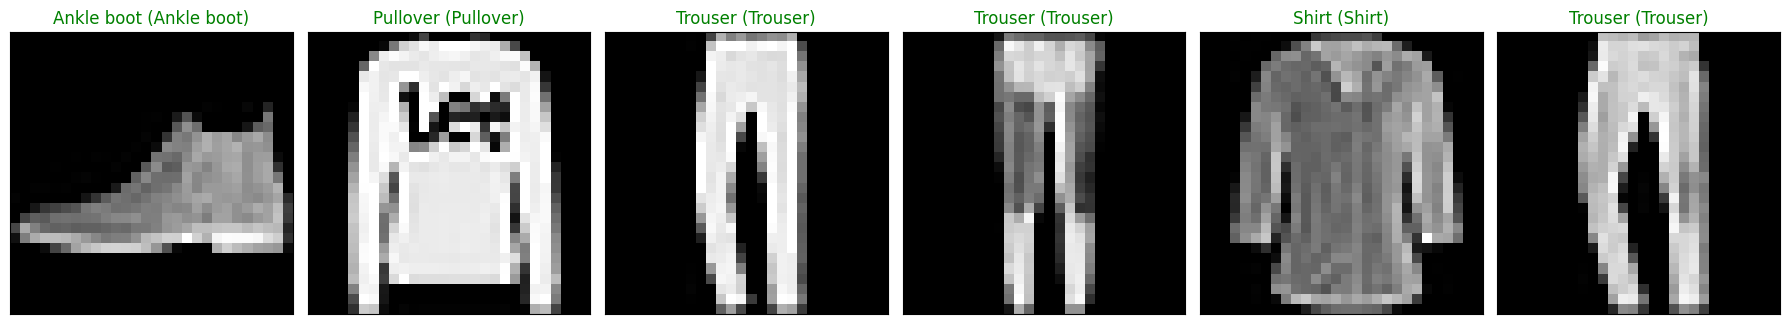

In [11]:
get_predictions_examples(model, test_loader)